<a href="https://colab.research.google.com/github/LeonardoDrLourenco/IA_AtividadeRedesCNN-ReconhecimentoImagens/blob/main/Atividade_RedesCNN_ReconhecimentoImagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo para reconhecimento de imagens de números de 0 a 9

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Carregar o conjunto de dados MNIST (Imagens com Dados de 0 a 9)
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Adicionar uma dimensão para os canais de cor (preto e branco neste caso)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Definir o modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinnar o modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 62s 63ms/step - loss: 0.1917 - accuracy: 0.9408 - val_loss: 0.0500 - val_accuracy: 0.9847
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0391 - val_accuracy: 0.9869
Epoch 3/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0289 - val_accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0385 - val_accuracy: 0.9874
Epoch 5/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0269 - val_accuracy: 0.9914


# Avaliação da precisão do algoritmo:

In [ ]:
# Avaliar do modelo nos dados de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'A perda nos dados de teste: {test_loss}')
print(f'A precisão nos dados de teste: {test_accuracy}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0269 - accuracy: 0.9914
A perda nos dados de teste: 0.026879174634814262
A precisão nos dados de teste: 0.9914000034332275


# Testar o algoritmo com imagens aleatórias

In [ ]:
import numpy as np

# Selecionar algumas imagens específicas para avaliar
images_to_evaluate = test_images[:10]
labels_to_evaluate = test_labels[:10]

# Previsões para essas imagens
predictions = model.predict(images_to_evaluate)

# Converter as previsões de volta para rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Exibir as previsões e os rótulos verdadeiros
for i in range(len(images_to_evaluate)):
    print(f'Imagem {i+1}:')
    print(f'  Rótulo verdadeiro: {labels_to_evaluate[i]}')
    print(f'  Rótulo previsto: {predicted_labels[i]}')

1/1 [==============================] - 0s 38ms/step
Imagem 1:
  Rótulo verdadeiro: 7
  Rótulo previsto: 7
Imagem 2:
  Rótulo verdadeiro: 2
  Rótulo previsto: 2
Imagem 3:
  Rótulo verdadeiro: 1
  Rótulo previsto: 1
Imagem 4:
  Rótulo verdadeiro: 0
  Rótulo previsto: 0
Imagem 5:
  Rótulo verdadeiro: 4
  Rótulo previsto: 4
Imagem 6:
  Rótulo verdadeiro: 1
  Rótulo previsto: 1
Imagem 7:
  Rótulo verdadeiro: 4
  Rótulo previsto: 4
Imagem 8:
  Rótulo verdadeiro: 9
  Rótulo previsto: 9
Imagem 9:
  Rótulo verdadeiro: 5
  Rótulo previsto: 5
Imagem 10:
  Rótulo verdadeiro: 9
  Rótulo previsto: 9


# Mostar os dados existentes na biblioteca:

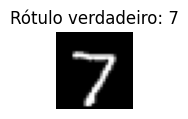

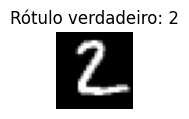

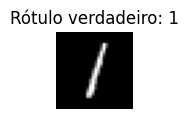

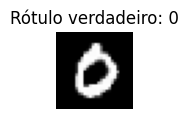

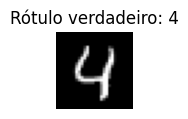

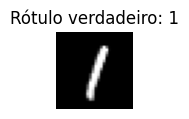

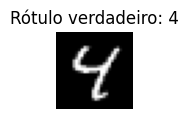

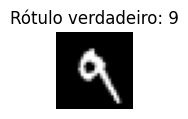

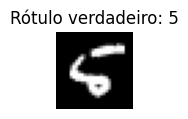

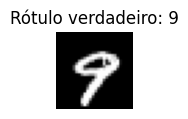

In [ ]:
import matplotlib.pyplot as plt

# Exibir as primeiras 10 imagens do conjunto de teste
for i in range(10):
    plt.figure(figsize=(1, 1))
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Rótulo verdadeiro: {test_labels[i]}')
    plt.axis('off')
    plt.show()


# 5. Criar uma imagem manualmente e passar para o algoritmo avaliar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-dejavu is already the newest version (2.37-2build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


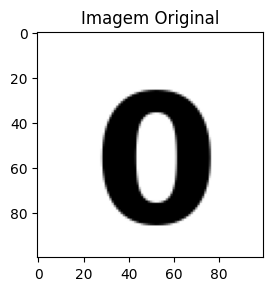

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2981 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1419 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1066 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0861 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0734 - accuracy: 0.9768
313/313 - 1s - loss: 0.0703 - accuracy: 0.9785 - 672ms/epoch - 2ms/step


1/1 [==============================] - 0s 60ms/step
O dígito previsto é: 0


In [35]:
!pip install pillow opencv-python-headless tensorflow

from PIL import Image, ImageDraw, ImageFont
import random
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


numero_aleatorio = random.randint(0, 9)


width, height = 100, 100
image = Image.new('RGB', (width, height), 'white')


draw = ImageDraw.Draw(image)

!apt-get install -y fonts-dejavu
font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 80)
draw.text((25, 10), str(numero_aleatorio), fill='black', font=font)
image.save('numero_teste.png')
image.show()


imagem = cv2.imread('numero_teste.png')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.title('Imagem Original')
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

plt.show()


mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

imagem = Image.open('numero_teste.png').convert('L').resize((28, 28))
imagem_array = np.array(imagem)
imagem_array = 255 - imagem_array
imagem_array = imagem_array / 255.0
imagem_array = np.expand_dims(imagem_array, axis=0)

predictions = model.predict(imagem_array)
predicted_digit = np.argmax(predictions)

print(f"O dígito previsto é: {predicted_digit}")
